<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [2]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

NameError: name 'pd' is not defined

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


--2024-12-03 14:24:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  47.4MB/s    in 0.7s    

2024-12-03 14:24:11 (47.4 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



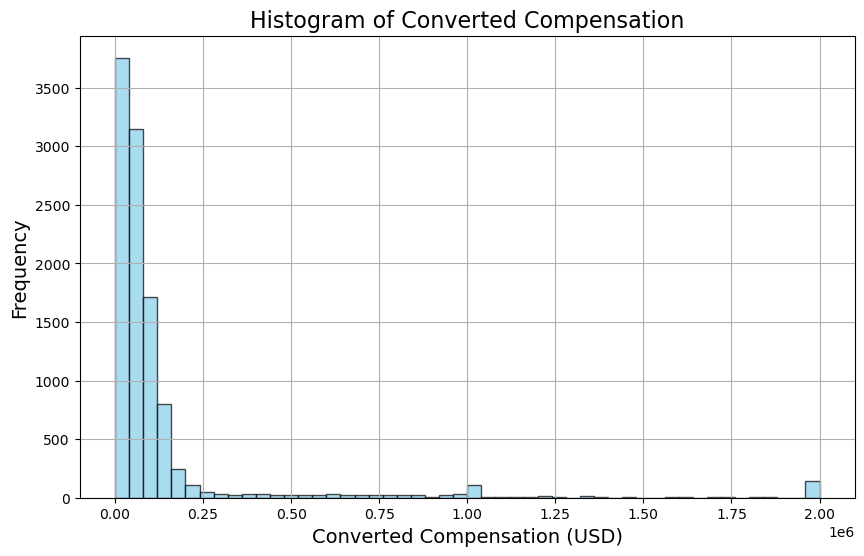

In [5]:
# your code goes here

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection


QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

converted_comp_cleaned = df['ConvertedComp'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(converted_comp_cleaned, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Converted Compensation", fontsize=16)
plt.xlabel("Converted Compensation (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

conn.close()


### Box Plots


Plot a box plot of `Age.`


--2024-12-03 14:24:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  45.6MB/s    in 0.8s    

2024-12-03 14:24:41 (45.6 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



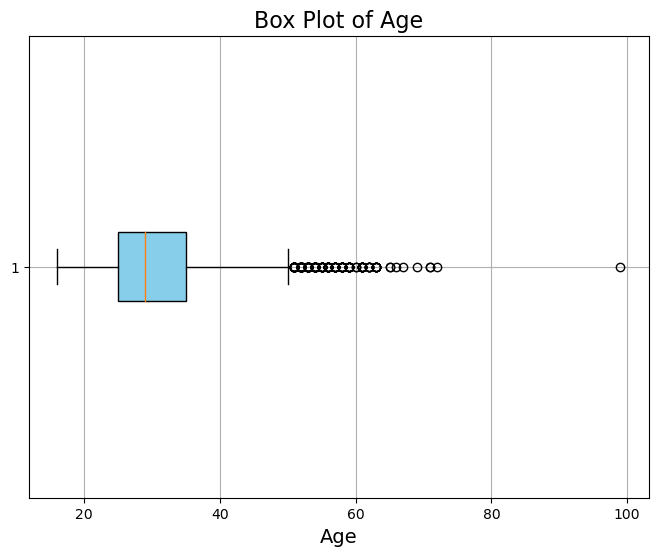

In [7]:
# your code goes here

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

age_cleaned = df['Age'].dropna()

plt.figure(figsize=(8, 6))
plt.boxplot(age_cleaned, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Box Plot of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.grid(True)
plt.show()

conn.close()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


--2024-12-03 15:21:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.40’

m4_survey_data.sqli 100%[===================>]  34.98M  46.5MB/s    in 0.8s    

2024-12-03 15:21:11 (46.5 MB/s) - ‘m4_survey_data.sqlite.40’ saved [36679680/36679680]



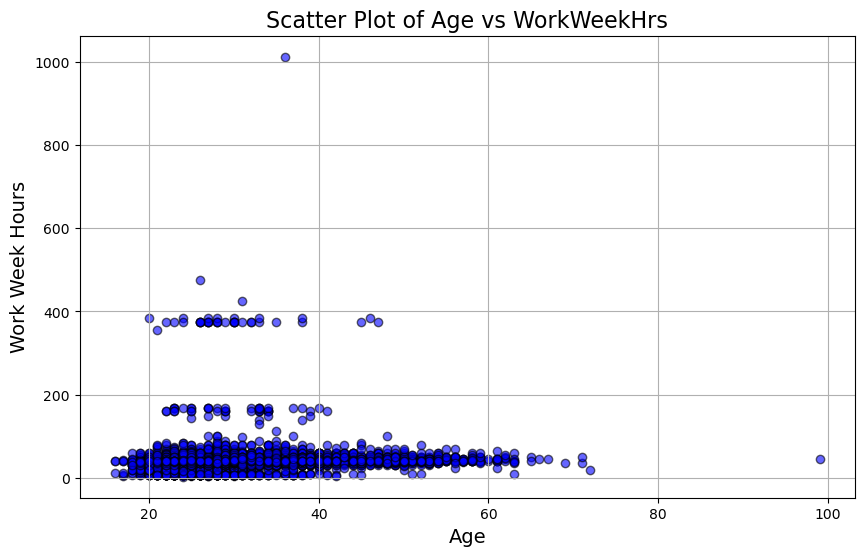

0.03651747018288012


In [45]:
# your code goes here
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection


QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

df_cleaned = df.dropna(subset=['Age', 'WorkWeekHrs'])

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['WorkWeekHrs'], alpha=0.6, color="blue", edgecolor="black")
plt.title("Scatter Plot of Age vs WorkWeekHrs", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Work Week Hours", fontsize=14)
plt.grid(True)
plt.show()


df = pd.read_sql_query(QUERY, conn)

cleaned_data = df.dropna(subset=['Age', 'WorkWeekHrs'])
correlation_value = cleaned_data['Age'].corr(cleaned_data['WorkWeekHrs'])

print(correlation_value)

conn.close()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


--2024-12-03 14:28:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  45.4MB/s    in 0.8s    

2024-12-03 14:28:07 (45.4 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



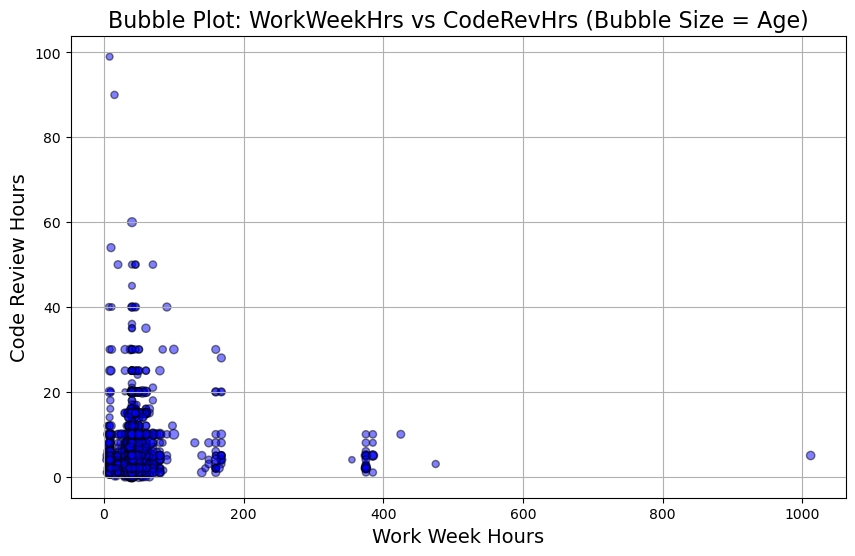

In [11]:
# your code goes here

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

df_cleaned = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['WorkWeekHrs'], df_cleaned['CodeRevHrs'], 
            s=df_cleaned['Age'], alpha=0.5, color="blue", edgecolor="black")
plt.title("Bubble Plot: WorkWeekHrs vs CodeRevHrs (Bubble Size = Age)", fontsize=16)
plt.xlabel("Work Week Hours", fontsize=14)
plt.ylabel("Code Review Hours", fontsize=14)
plt.grid(True)
plt.show()

conn.close()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [57]:
# your code goes here

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection


QUERY = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(QUERY, conn)

print("Tables in the database:")
print(table_names)





QUERY = "SELECT DatabaseDesireNextYear FROM master"
df = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_cleaned = df['DatabaseDesireNextYear'].dropna()

# Split entries into individual databases
databases_split = []
for row in df_cleaned:
    databases_split.extend(row.split(';'))

# Convert to Pandas Series and count occurrences
databases_series = pd.Series(databases_split)
database_counts = databases_series.value_counts()

# Get the total and MongoDB count
total_count = database_counts.sum()
mongodb_count = database_counts.get('MongoDB', 0)

# Calculate the percentage
mongodb_percentage = (mongodb_count / total_count) * 100

# Display the result
mongodb_percentage
# Close the connection
conn.close()





--2024-12-03 15:43:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.52’

m4_survey_data.sqli 100%[===================>]  34.98M  47.3MB/s    in 0.7s    

2024-12-03 15:43:31 (47.3 MB/s) - ‘m4_survey_data.sqlite.52’ saved [36679680/36679680]

Tables in the database:
                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge

DatabaseError: Execution failed on sql 'SELECT DatabaseDesireNextYear FROM master': no such column: DatabaseDesireNextYear

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


--2024-12-03 14:56:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.21’

m4_survey_data.sqli 100%[===================>]  34.98M  46.2MB/s    in 0.8s    

2024-12-03 14:56:17 (46.2 MB/s) - ‘m4_survey_data.sqlite.21’ saved [36679680/36679680]



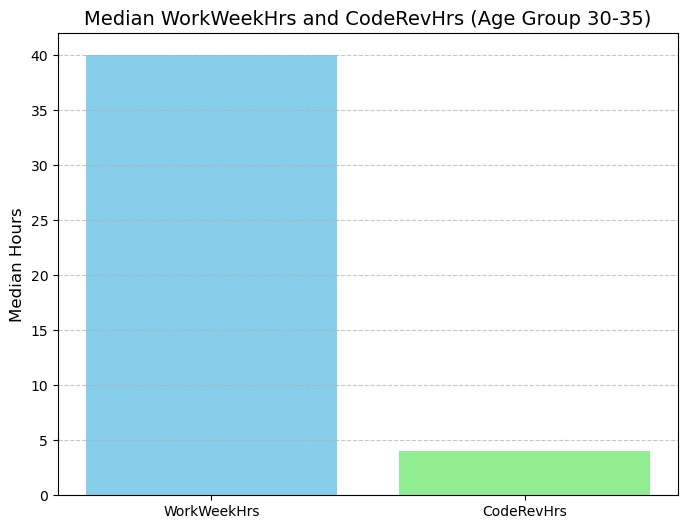

In [26]:
# your code goes here

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection


QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

filtered_data = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_workweekhrs = filtered_data['WorkWeekHrs'].median()
median_coderevhrs = filtered_data['CodeRevHrs'].median()

categories = ['WorkWeekHrs', 'CodeRevHrs']
values = [median_workweekhrs, median_coderevhrs]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightgreen'])
plt.title("Median WorkWeekHrs and CodeRevHrs (Age Group 30-35)", fontsize=14)
plt.ylabel("Median Hours", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

conn.close()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


--2024-12-03 14:59:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.24’

m4_survey_data.sqli 100%[===================>]  34.98M  45.6MB/s    in 0.8s    

2024-12-03 14:59:26 (45.6 MB/s) - ‘m4_survey_data.sqlite.24’ saved [36679680/36679680]



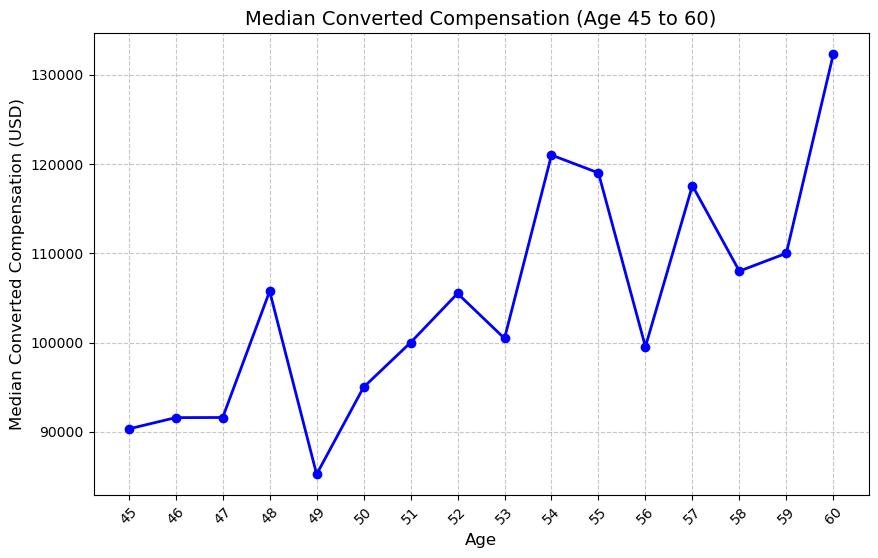

In [29]:
# your code goes here
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

QUERY = """
SELECT Age, ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

filtered_data = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

median_comp_by_age = filtered_data.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title("Median Converted Compensation (Age 45 to 60)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Median Converted Compensation (USD)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(median_comp_by_age.index, rotation=45)
plt.show()

conn.close()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


--2024-12-03 15:00:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.25’

m4_survey_data.sqli 100%[===================>]  34.98M  44.5MB/s    in 0.8s    

2024-12-03 15:00:39 (44.5 MB/s) - ‘m4_survey_data.sqlite.25’ saved [36679680/36679680]



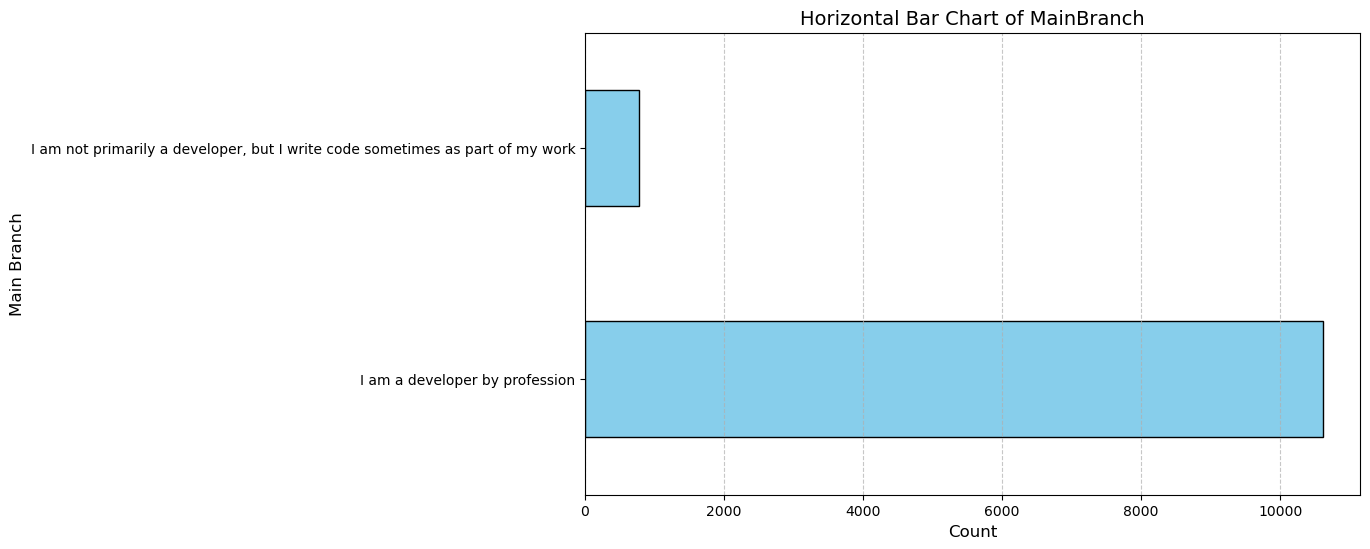

In [30]:
# your code goes here
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection



QUERY = """
SELECT MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Horizontal Bar Chart of MainBranch", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Main Branch", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

conn.close()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
